<a href="https://colab.research.google.com/github/Shrikantbhole/flexlione-feature-docs/blob/main/Unplanned_Score_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flow chart for unplanned Score calculation



# Flow chart for unplanned Score Calculation

In [ ]:
Sprint Score calculation;
// Estimated hours = total planned hrs for sprint
(Sum(Eq hours)/estimated Hours)X10

How to calculate Eq Score?

if(Is it a Planned Task) {
 switch (What Policy have you used) {
  
  Binary =>  if( Checklist completed > Acceptance criteria){
    if(All Essential Checklist are met){
      Eq hours = Estimated hours for task
    }
    else{Eq hours = 0}
  } 
  else{Eq hours = 0};
  Incremental => Eq hours = Checklist completed/total checklist;
  
}}
else{
  We will treat it as unplanned task;
  User will request for Eq hours for each task;
  Eq hours = Approved hours by manager;
  
  
}

SyntaxError: ignored

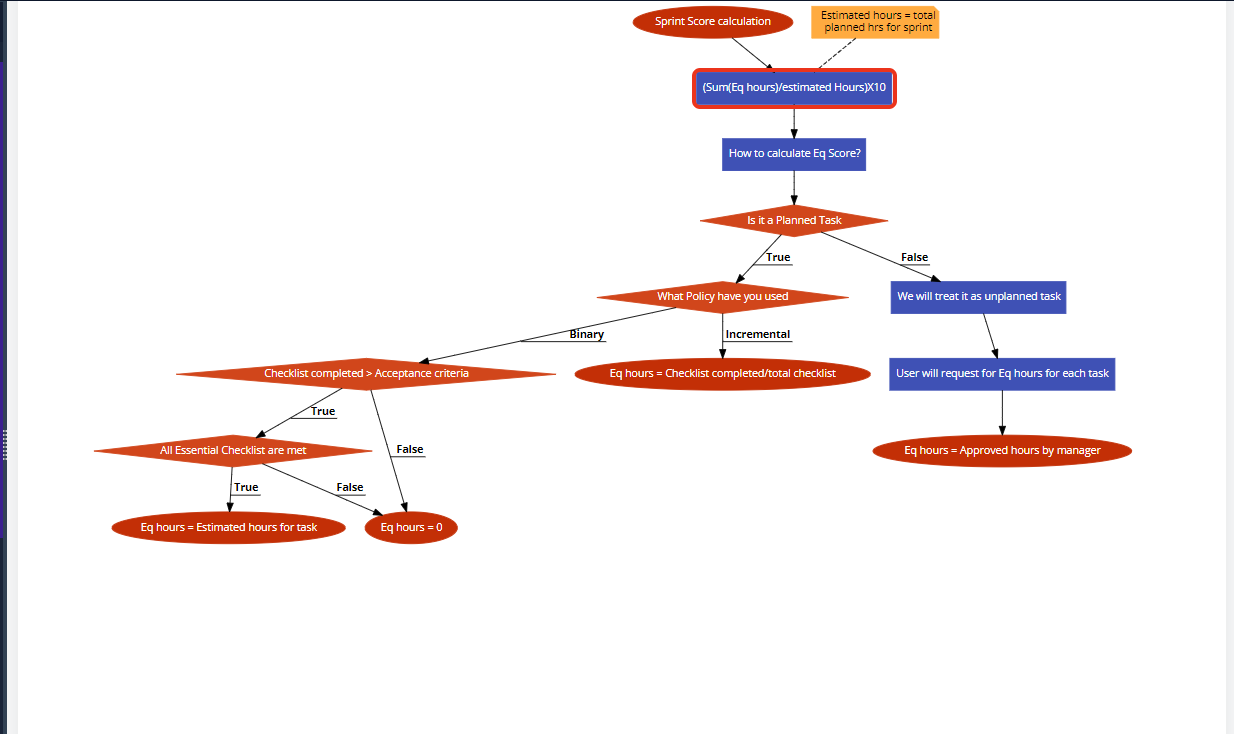

# APIs used in unplanned Score calculation

On Request

# On Request

In [ ]:
Method - Post
https://ptl-api-dev.flexli.in/flexlione-webapi-alpha/api/v1/Sprint/UpdateScore/

Body

{
  "SprintId": "string",
  "TaskId": "string",
  "RequestedHours": "int",
  “ProfileId”: “string”
“include”: “request”        (request/approve)

  }

response

Response : { 

“Id”: “string”
 "SprintId": "string",
  "TaskId": "string",
  "RequestedHours": "int",
  “ApprovedHours”: “int”
  “ProfileId”: “string”,
“scoreStatus”: “string”
 }



Logic

1. Create an Enum EUnplannedTaskStatus : NotRequested, Requested, Reviewed. 
2. Initially, status will be NotRequested. Once you receive the request change status to Requested
3. Please note if status value is Reviewed the do not accept request for requestScore
4. Whenever a new entry is added, if sprint Id and Task -id combination is a new - a new entry will be added into table “sprint-unplanned-tasks” table. 
5. If entry already exist for the given combination of sprint and task then data will be modified
6. Profile Id should match with Task Assigned To id




# On Approve

In [ ]:
Method - Post
https://ptl-api-dev.flexli.in/flexlione-webapi-alpha/api/v1/Sprint/UpdateScore/

Body
{
  "SprintId": "string",
  "TaskId": "string",
"ApprovedHours: "string",
“ProfileId”: “string”
“include”: “Approve”        (request/approve)
}

Response : { 

“Id”: “string”
 "SprintId": "string",
  "TaskId": "string",
  "RequestedHours": "int",
  “ApprovedHours”: “int”
  “ProfileId”: “string”,
“scoreStatus”: “string”
 }


Logic

1. Create an Enum EUnplannedTaskStatus : NotRequested, Requested, Reviewed. 2. Initially, status will be NotRequested. Once you receive the request change status to Requested
3. Once you receive ApprovedHours, change status to Reviewed
Profile Id should match with Manager of Task Assigned To Id


# On Spront Close/review

1. alised to denominator of 10. Let’s say user get 15 points of planned task and 1.5 points for unplanned task and maximum possible points for sprint (based upon planning was 20), then score = 15 + 1.5 / 20
2. If sprint status is closed and Status of any planned task = Requested. Then all the hours requested will be by default approved for only for the purpose of score calculation. HowevAt time of closure/review of sprint score for unplanned task will be added to planned task score
3. For all unplanned tasks during the sprint , sum all Approved hours and divide by 3 , add the result directly to tally of the Planned task score. The final result will be normer, status will remain “Requested” and  ApprovedScore=0
